In [1]:
# Standard libraries
import numpy as np
import json
import h5py
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator

from lib.sych.data_fc_db import DataFCDatabase

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/neuro'

#params['root_path_paw']   = gui_fpath("Path to Paw data",         params['root_path_data'])
#params['root_path_lick']  = gui_fpath("Path to Lick data",        params['root_path_paw'])
#params['root_path_whisk'] = gui_fpath("Path to Whisk Data",       params['root_path_lick'])
# params['root_path_te']    = gui_fpath("Select TE results folder", params['root_path_data'])

In [3]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [4]:
dataDB.read_te_files()
dataDB.read_neuro_files()
dataDB.read_resample_paw_files()
dataDB.read_resample_lick_files()   # Currently does not work. Ask Yaro if we need it
dataDB.read_resample_whisk_files()

No TE files loaded, skipping reading part


IntProgress(value=0, description='Read Neuro Data:', max=220)

Calculated performance 0.7264150943396226 does not match external 0.7333333333333333
Calculated performance 0.803680981595092 does not match external 0.808641975308642
Calculated performance 0.8411764705882353 does not match external 0.8436578171091446
Calculated performance 0.956989247311828 does not match external 0.9621621621621622
Calculated performance 0.6808510638297872 does not match external 0.6956521739130435
Calculated performance 0.9582366589327146 does not match external 0.9604651162790697
Calculated performance 0.4851258581235698 does not match external 0.4840182648401826
--Warning: For iMISS behaviour max index 437 exceeds nTrials 437
---Cropped excessive behaviour trials from 86 to 85
Calculated performance 0.42795389048991356 does not match external 0.6902017291066282
Calculated performance 0.2534562211981567 does not match external 0.30386740331491713
Calculated performance 0.4444444444444444 does not match external 0.47227191413237923
Calculated performance 0.56680161

--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyos

In [5]:
pTHR = 0.7
dataDB.mark_days_expert_naive(pTHR)

# Multi-Regional Metrics

* Measures of instantainous redundancy
    - Average Correlation
    - PCA(1) - ?
    - Entropy, TC
* Measures of temporal relations
    - CrossCorrelation
    - CrossMI
    - PI_ND
    
## TODO
1. Normalization of entropy
    * Check if entropy outliers correlate with number of trials
    * Test NPEET metrics for convergence.
    * Check why TC is sometimes negative, it should not be
2. Improve convergence using sliding window to increase number of samples

## 1.1 Average Correlation

doing mouse mtp_1
doing mouse mtp_10
doing mouse mtp_11
doing mouse mtp_12
doing mouse mtp_13
doing mouse mtp_15
doing mouse mtp_16
doing mouse mtp_2
doing mouse mtp_7
doing mouse mvg_2
doing mouse mvg_3
doing mouse mvg_4
doing mouse mvg_5
doing mouse mvg_6
doing mouse mvg_7
doing mouse mvg_8
doing mouse mvg_9


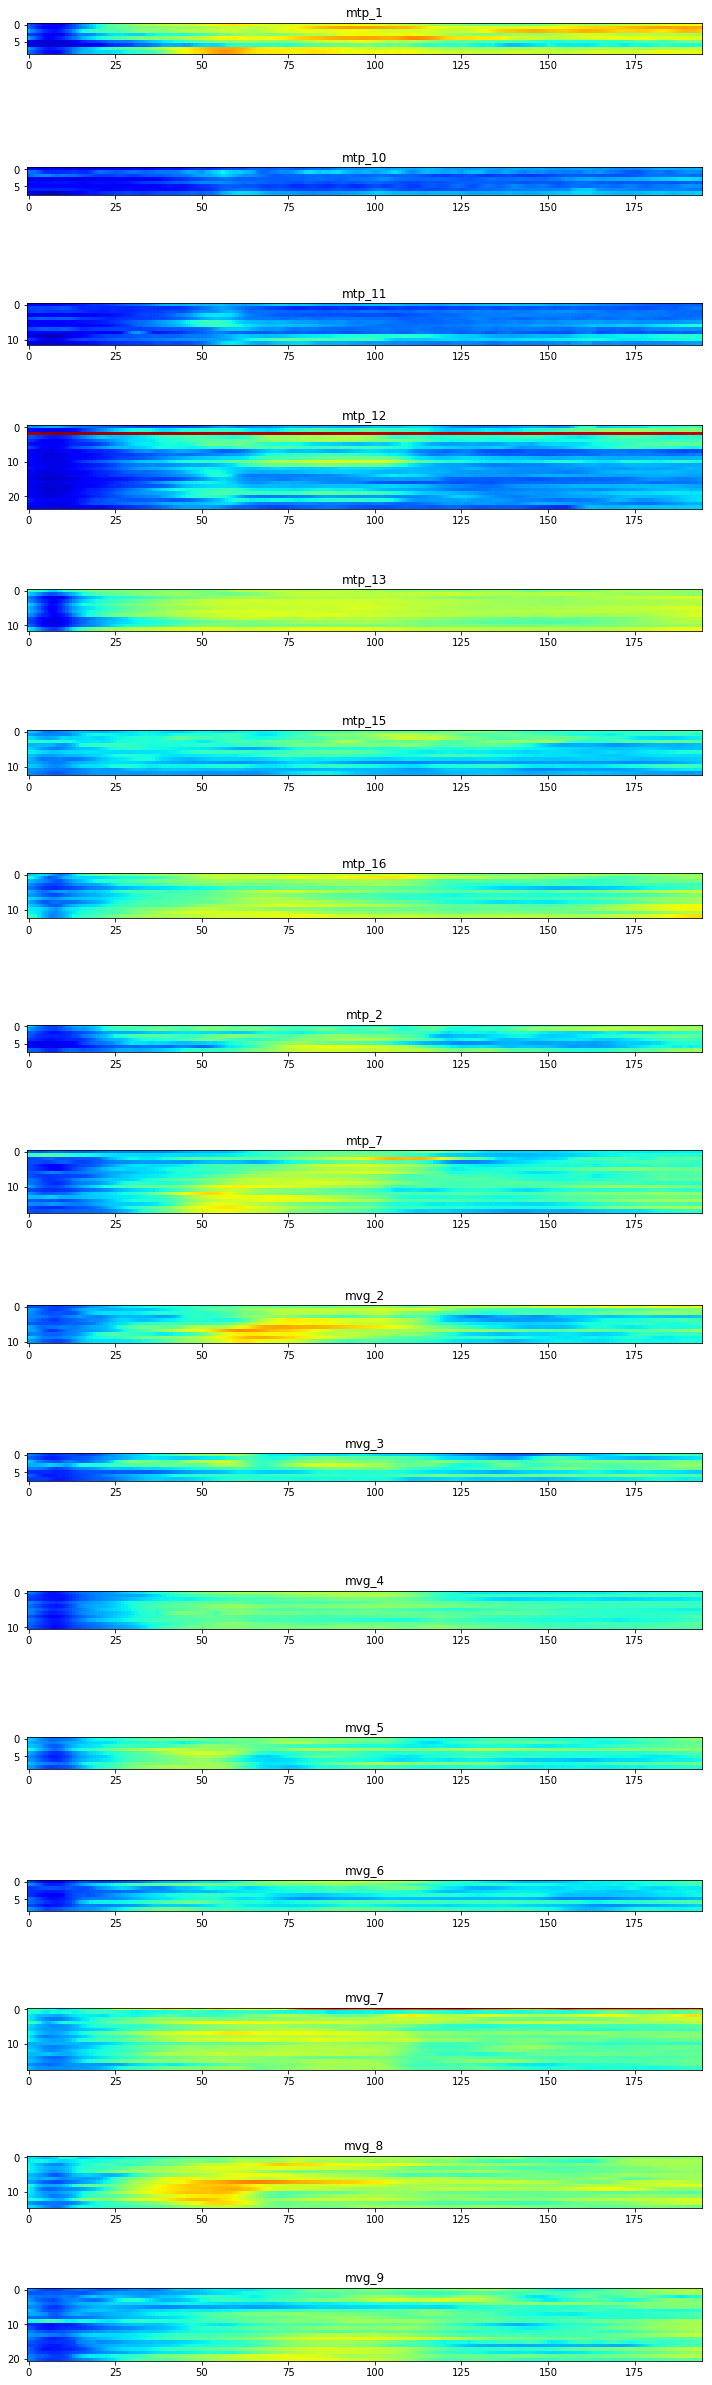

In [12]:
window = 6
mc = MetricCalculator(serial=True, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        idxsTrials = dataDB.dataTrials[idx]['iGO'] - 1
#         print('* nTrials', len(idxsTrials))
        mc.set_data(dataDB.dataNeuronal[idx][idxsTrials], 'rsp', zscoreDim=None, timeWindow=window)
        rez += [mc.metric3D('avgcorr', 's', metricSettings=None, sweepSettings=None)[:200 - window + 1]]
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet', vmin=0, vmax=1)
plt.show()

mtp_1 -0.5010216948236402 2.0840773951272147
mtp_10 -0.24109529827028053 2.0140516612879753
mtp_11 0.3139413837387409 1.9793618680479064
mtp_12 -0.3876599075407308 2.0265782148524907
mtp_13 -0.8522306170193895 1.7573203105839559
mtp_15 -0.7236707214030863 1.707136669267167
mtp_16 -0.8573345990708092 1.7786631993425166
mtp_2 0.16023685983538322 2.101852737705333
mtp_7 -0.3108128027009264 1.8742991657041517
mvg_2 -0.09453341276887163 1.933773142170591
mvg_3 -0.3129634593400829 1.8702513233835372
mvg_4 -0.2654913094444555 2.2490646708008772
mvg_5 -0.7505822643338353 1.997468775732683
mvg_6 -0.4222357489760549 1.9555523182775234
mvg_7 -1.0894183857143778 2.1660249036351957
mvg_8 -0.703510997878284 2.257277795472277
mvg_9 -0.1810486678875556 2.3580082514322833


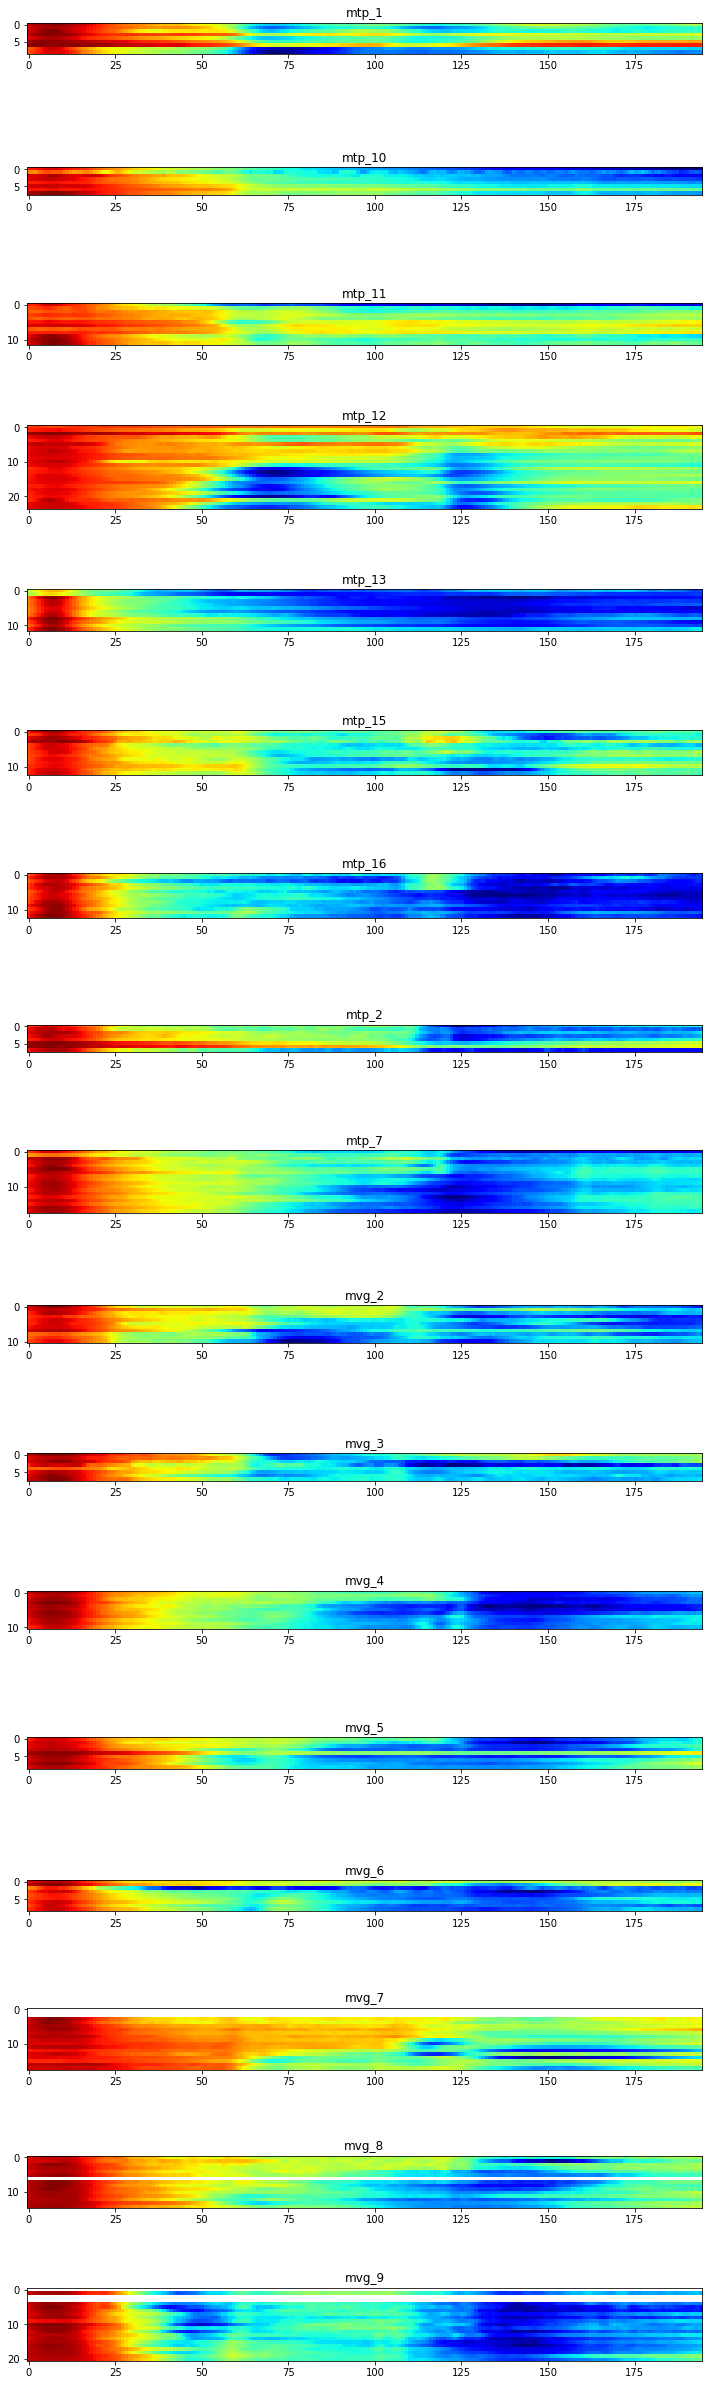

Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/py36nest/lib/python3.6/si

In [13]:
window = 6
mc = MetricCalculator(serial=False, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        idxsTrials = dataDB.dataTrials[idx]['iGO'] - 1
        mc.set_data(dataDB.dataNeuronal[idx][idxsTrials], 'rsp', zscoreDim='p', timeWindow=window)
        rez += [mc.metric3D('avg_entropy', 's', metricSettings=None, sweepSettings=None)[:200-window+1]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()

zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
mtp_1 -0.41584671345022595 0.5893350407804404
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
mtp_10 -0.33455298023288993 0.8019489441572217
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
mtp_11 -0.33679244830135757 0.6084283123853391
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zomg (196, 12) ps  sp
zo

/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


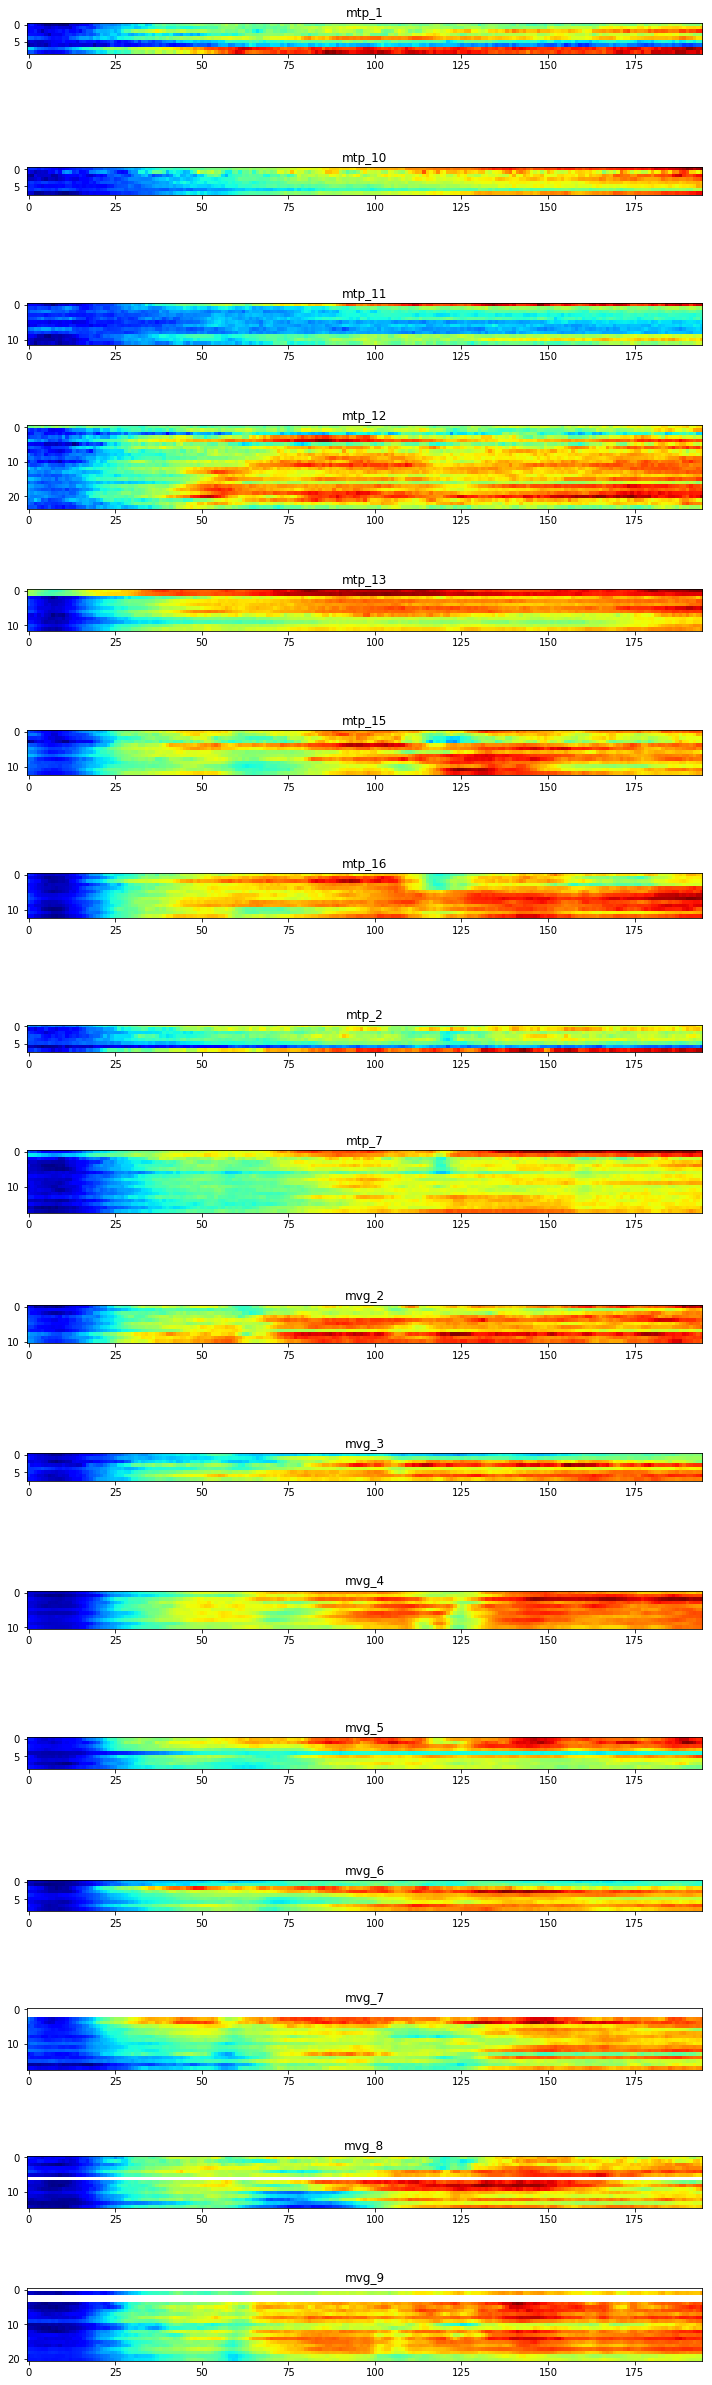

In [6]:
window = 6
mc = MetricCalculator(serial=False, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        idxsTrials = dataDB.dataTrials[idx]['iGO'] - 1
        mc.set_data(dataDB.dataNeuronal[idx][idxsTrials], 'rsp', zscoreDim='p', timeWindow=window)
        rez += [mc.metric3D('avg_TC', 's', metricSettings=None, sweepSettings=None)[:200 - window + 1]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()

mtp_1 0.05048241082139166 0.37359123520249854
mtp_10 0.06205999061819097 0.5375830310383588
mtp_11 0.10588120863817624 0.5594299829905585
mtp_12 0.06934565357242588 0.43653818317173415
mtp_13 0.1356438420637638 0.6391165420707491
mtp_15 0.19133017055303217 0.6825833820857193
mtp_16 0.22412974142889938 0.7086661371089445
mtp_2 0.023281300494307475 0.47665110233781594
mtp_7 0.13993654179859555 0.6740051736157433
mvg_2 0.1270911795025445 0.5637489801588828
mvg_3 0.13221755414755396 0.5946760972683878
mvg_4 0.06565155883588322 0.176784600805483
mvg_5 0.11961209635222668 0.6753696722336692
mvg_6 0.13330156802209228 0.6600317316096731
mvg_7 0.03144825623512819 0.16229855974717702
mvg_8 0.052090710686524606 0.1673270734864916
mvg_9 0.04966975471786705 0.17048049614216443


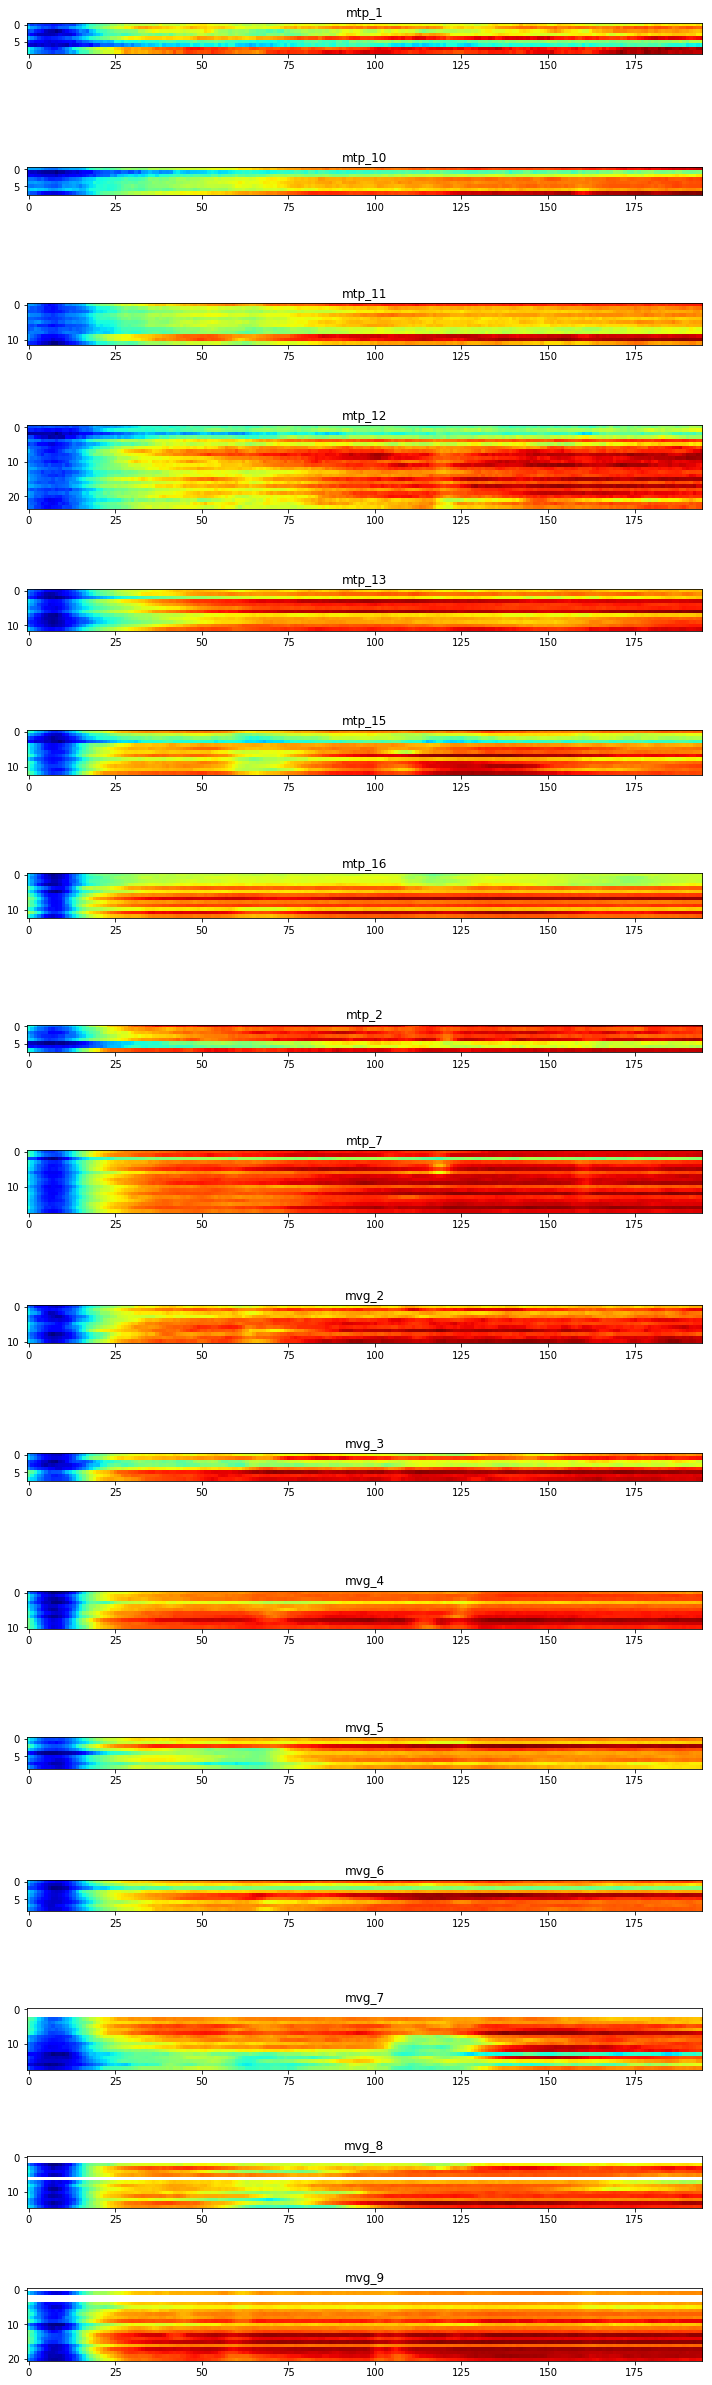

In [8]:
window=6
mc = MetricCalculator(serial=False, verbose=False)

fig, ax = plt.subplots(nrows=len(dataDB.mice), figsize=(10, 2 * len(dataDB.mice)), tight_layout=True)
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    rows = dataDB.get_rows('neuro', {'mousename' : mousename})
    
    rez = []
    for idx, row in rows.iterrows():
        idxsTrials = dataDB.dataTrials[idx]['iGO'] - 1
        mc.set_data(dataDB.dataNeuronal[idx][idxsTrials], 'rsp', zscoreDim='p', timeWindow=window)
        rez += [mc.metric3D('avg_PI', 's', metricSettings={'max_lag': 1}, sweepSettings=None)[:200-window+1]]
        
    print(mousename, np.nanmin(rez), np.nanmax(rez))
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez), cmap='jet')
plt.show()